In [1]:
import pandas as pd
import random
import plotly.graph_objects as go
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Anime_rank.csv')
df.shape

(8650, 9)

Tratamento dos dados

In [2]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
print(missing_values)

UID             0
Title           0
Rank            0
Stream type     0
Episodes       42
Start date      2
End date       99
Members         0
Score           0
dtype: int64


In [3]:
# Calcular a mediana da coluna 'Episodes'
episodes_median = df['Episodes'].median()

# Preencher valores ausentes de 'Episodes' com a mediana
df['Episodes'].fillna(episodes_median, inplace=True)
print(df['Episodes'])

0       28.0
1       64.0
2       24.0
3       51.0
4       10.0
        ... 
8645     1.0
8646     1.0
8647     1.0
8648    12.0
8649     1.0
Name: Episodes, Length: 8650, dtype: float64


In [4]:
missing_values = df.isnull().sum()
print(missing_values)


UID             0
Title           0
Rank            0
Stream type     0
Episodes        0
Start date      2
End date       99
Members         0
Score           0
dtype: int64


In [5]:
# Preencher valores ausentes de 'Start date' e 'End date' com 'Unknown'
df['Start date'].fillna('Unknown', inplace=True)
df['End date'].fillna('Unknown', inplace=True)

# Convertendo 'Start date' e 'End date' para tipos de data
df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
df['End date'] = pd.to_datetime(df['End date'], errors='coerce')

df.head()

print(missing_values)

UID             0
Title           0
Rank            0
Stream type     0
Episodes        0
Start date      2
End date       99
Members         0
Score           0
dtype: int64


In [6]:
# Selecionar todos os animes que não têm 'End date'
animes_sem_end_date = df[df['End date'].isna()]
# Exibir os primeiros resultados para verificação
animes_sem_end_date.head()

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score
14,15,Monogatari Series: Off & Monster Season,15,ONA,11.0,2024-07-01,NaT,"44,235",8.97
52,53,One Piece,53,TV,11.0,1999-10-01,NaT,"2,385,470",8.72
161,162,"""Oshi no Ko"" 2nd Season",162,TV,13.0,2024-07-01,NaT,"249,279",8.44
199,200,Doupo Cangqiong: Nian Fan,200,ONA,104.0,2022-07-01,NaT,"7,204",8.38
342,343,Fairy Tail: 100-nen Quest,343,TV,11.0,2024-07-01,NaT,"107,281",8.23


In [7]:
# Remover vírgulas da coluna 'Members' e converter para numérico
df['Members'] = df['Members'].str.replace(',', '').astype(int)

# Converter a coluna 'Score' para numérico
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

# Exibir as primeiras linhas para verificação
df.head()


,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,800615,9.35
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,3373923,9.09
2,3,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,2584616,9.07
3,4,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,636631,9.06
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,2305044,9.05


In [8]:
descriptive_stats = df.describe()

# Exibir as estatísticas descritivas
print(descriptive_stats)

               UID         Rank     Episodes       Members        Score
count  8650.000000  8650.000000  8650.000000  8.650000e+03  8650.000000
mean   4325.500000  4325.500000    15.225202  1.107777e+05     7.039057
std    2497.184248  2497.184248    34.107119  2.702682e+05     0.593492
min       1.000000     1.000000     1.000000  2.480000e+02     6.150000
25%    2163.250000  2163.250000     1.000000  5.303000e+03     6.550000
50%    4325.500000  4325.500000    11.000000  2.136100e+04     6.970000
75%    6487.750000  6487.750000    13.000000  9.061075e+04     7.420000
max    8650.000000  8650.000000  1787.000000  3.980987e+06     9.350000


Gráficos para melhor entedimento dos dados

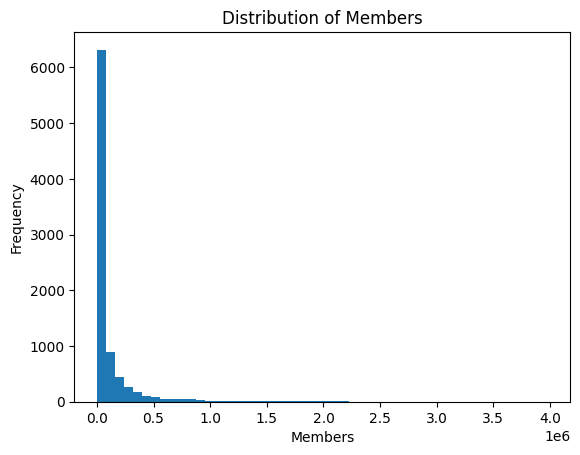

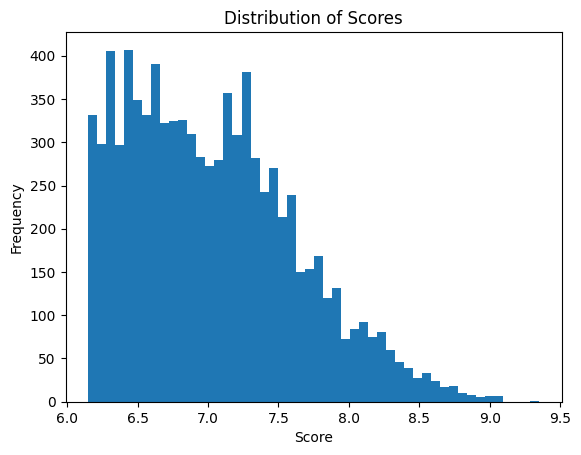

In [9]:
# Histograma para 'Members'
df['Members'].plot(kind='hist', bins=50, title='Distribution of Members')
plt.xlabel('Members')
plt.show()

# Histograma para 'Score'
df['Score'].plot(kind='hist', bins=50, title='Distribution of Scores')
plt.xlabel('Score')
plt.show()

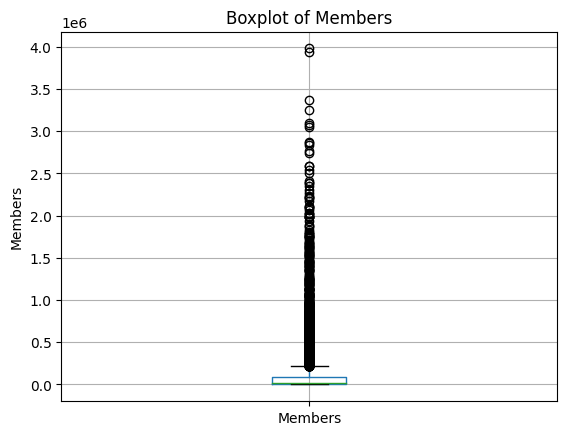

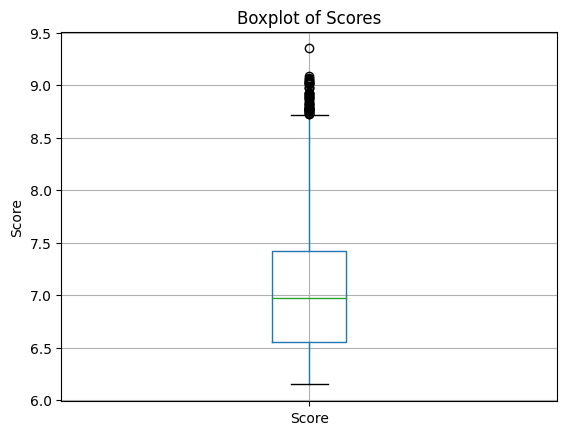

In [10]:
# Boxplot para 'Members'
df.boxplot(column='Members')
plt.title('Boxplot of Members')
plt.ylabel('Members')
plt.show()

# Boxplot para 'Score'
df.boxplot(column='Score')
plt.title('Boxplot of Scores')
plt.ylabel('Score')
plt.show()


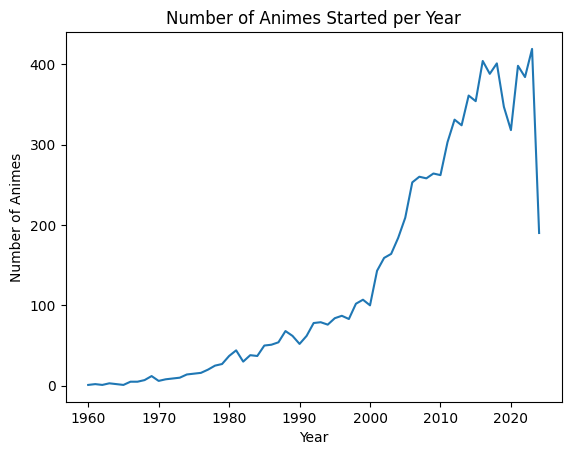

In [11]:
# Extrair ano da coluna 'Start date'
df['Start Year'] = df['Start date'].dt.year

# Contar animes por ano de início
animes_por_ano = df['Start Year'].value_counts().sort_index()

# Plotar a contagem de animes por ano
animes_por_ano.plot(kind='line', title='Number of Animes Started per Year')
plt.xlabel('Year')
plt.ylabel('Number of Animes')
plt.show()


       UID                                            Title  Rank Stream type  \
0        1                                Sousou no Frieren     1         TV    
1        2                 Fullmetal Alchemist: Brotherhood     2         TV    
2        3                                      Steins;Gate     3         TV    
3        4                                         Gintama°     4         TV    
4        5               Shingeki no Kyojin Season 3 Part 2     5         TV    
...    ...                                              ...   ...         ...   
8003  8004                                           Seiren  8004         TV    
8017  8018                                  Hajimete no Gal  8018         TV    
8046  8047               Hachi-nan tte, Sore wa Nai deshou!  8047         TV    
8266  8267                     Shikkakumon no Saikyou Kenja  8267         TV    
8308  8309  Boku no Kanojo ga Majimesugiru Sho-bitch na Ken  8309         TV    

      Episodes Start date  

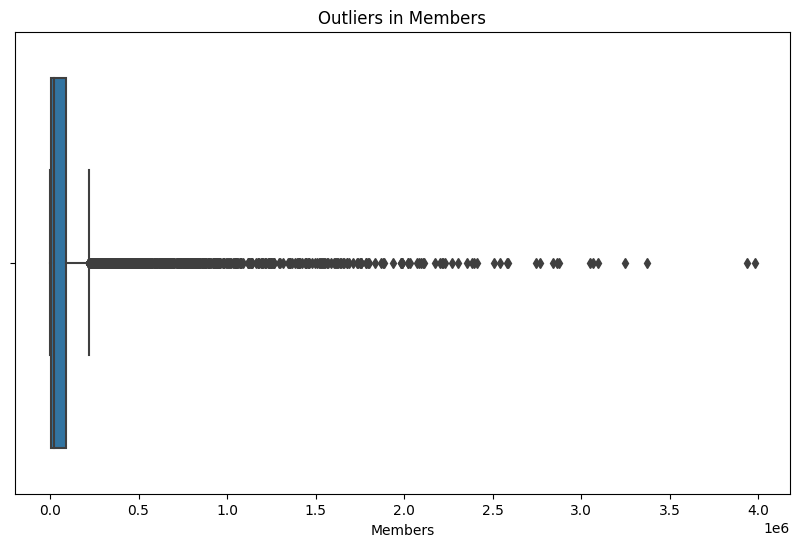

In [12]:
# Identificar outliers em 'Members' usando o método IQR
Q1 = df['Members'].quantile(0.25)
Q3 = df['Members'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Members'] < (Q1 - 1.5 * IQR)) | (df['Members'] > (Q3 + 1.5 * IQR))]

# Exibir outliers
print(outliers)

# Plotar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Members'])
plt.title('Outliers in Members')
plt.show()


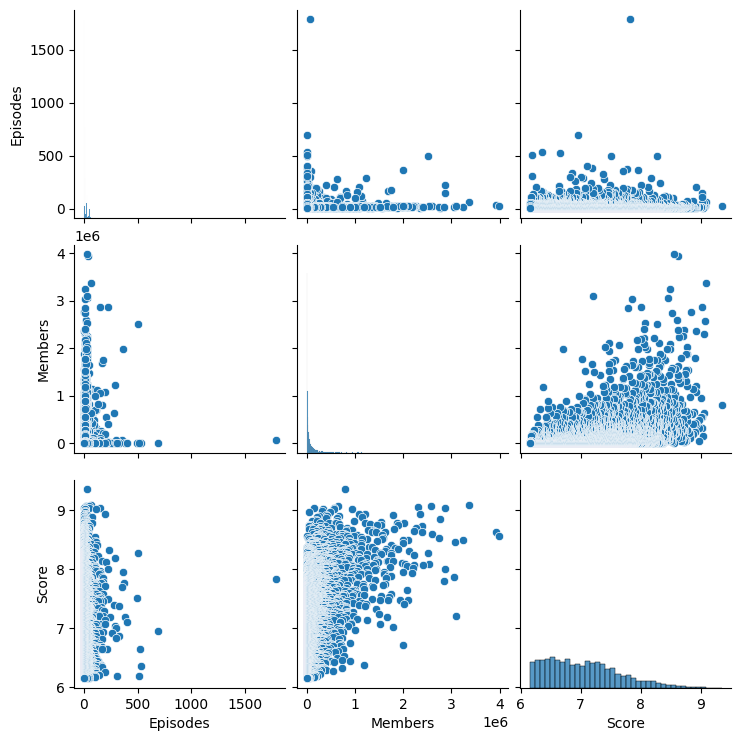

In [13]:
# Pair plot para ver as relações entre múltiplas variáveis
sns.pairplot(df[['Episodes', 'Members', 'Score']])
plt.show()


Perguntas de Negócio:

1- Quais são os fatores que mais influenciam a popularidade de um anime?

C:\Users\Matheus\AppData\Local\Temp\ipykernel_10108\1887620501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                 UID      Rank  Episodes   Members     Score  Start Year
UID         1.000000  1.000000 -0.036119 -0.373918 -0.975218   -0.174629
Rank        1.000000  1.000000 -0.036119 -0.373918 -0.975218   -0.174629
Episodes   -0.036119 -0.036119  1.000000  0.063622  0.040029   -0.174912
Members    -0.373918 -0.373918  0.063622  1.000000  0.442872    0.134834
Score      -0.975218 -0.975218  0.040029  0.442872  1.000000    0.176008
Start Year -0.174629 -0.174629 -0.174912  0.134834  0.176008    1.000000


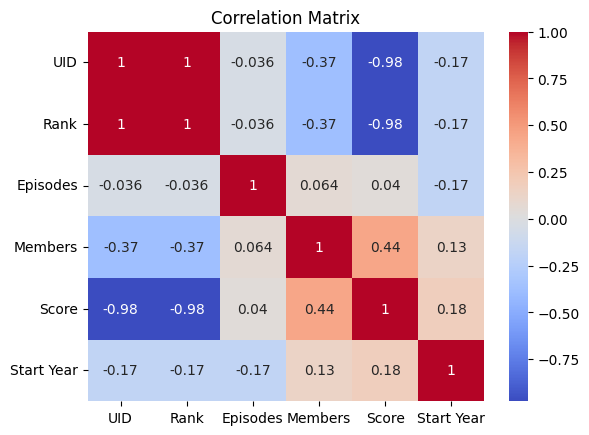

In [14]:
# Matriz de correlação
correlation_matrix = df.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


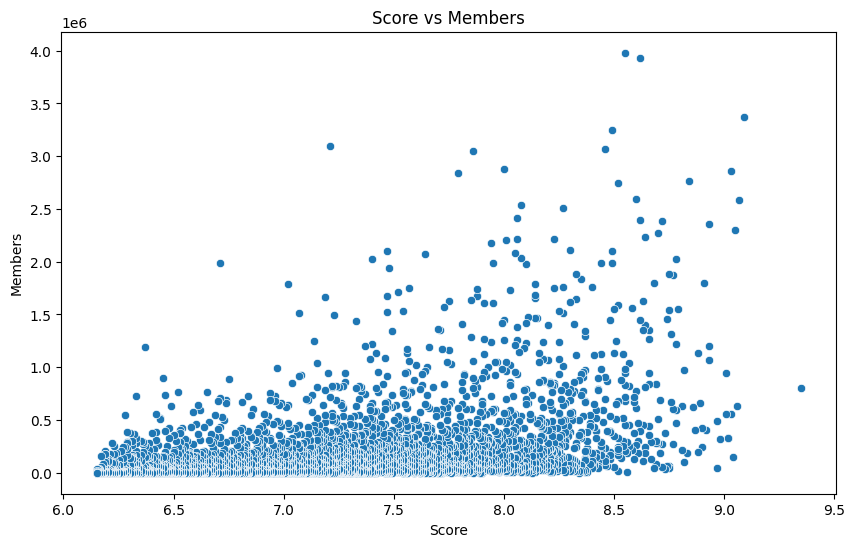

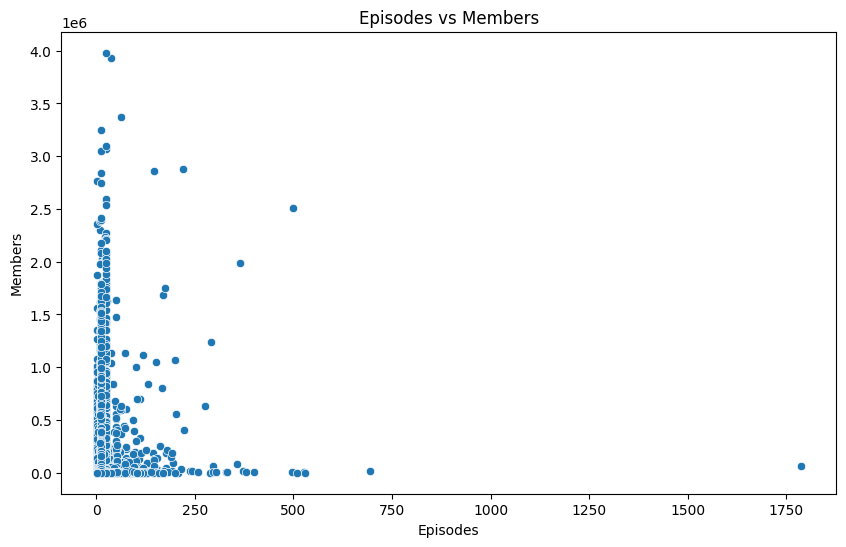

In [15]:
# Scatter plot de Members vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Members', data=df)
plt.title('Score vs Members')
plt.xlabel('Score')
plt.ylabel('Members')
plt.show()

# Scatter plot de Members vs Episodes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Episodes', y='Members', data=df)
plt.title('Episodes vs Members')
plt.xlabel('Episodes')
plt.ylabel('Members')
plt.show()


In [16]:
import statsmodels.api as sm

# Selecionar variáveis independentes e dependentes
X = df[['Score', 'Episodes']]
y = df['Members']

# Adicionar uma constante (necessária para o statsmodels)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Members   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1069.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:08:57   Log-Likelihood:            -1.1950e+05
No. Observations:                8650   AIC:                         2.390e+05
Df Residuals:                    8647   BIC:                         2.390e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.308e+06    3.1e+04    -42.242      0.0

2- Existe uma relação entre a pontuação (Score) de um anime e o número de episódios?

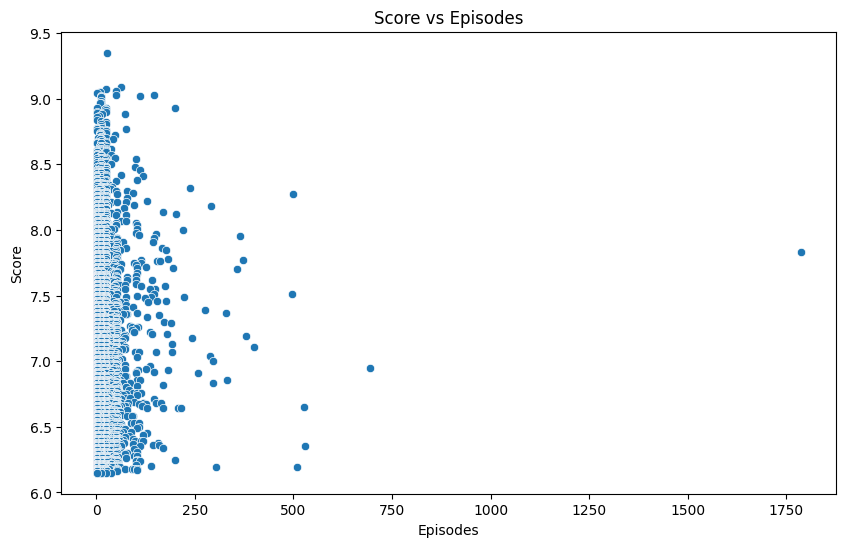

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Episodes', y='Score', data=df)
plt.title('Score vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.show()

In [18]:
# Calcular o coeficiente de correlação de Pearson
correlation = df['Score'].corr(df['Episodes'])
print(f'Coeficiente de Correlação entre Score e Episodes: {correlation}')

Coeficiente de Correlação entre Score e Episodes: 0.040029426764824814


In [19]:
# Selecionar as variáveis independentes e dependentes
X = df['Episodes']
y = df['Score']

# Adicionar uma constante (necessária para o statsmodels)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.88
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           0.000196
Time:                        10:08:58   Log-Likelihood:                -7753.4
No. Observations:                8650   AIC:                         1.551e+04
Df Residuals:                    8648   BIC:                         1.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0285      0.007   1006.500      0.0

3- Qual a tendência de lançamento de animes ao longo dos anos?

In [20]:
print(df[['Title', 'Start date']].head())

                                Title Start date
0                   Sousou no Frieren 2023-09-01
1    Fullmetal Alchemist: Brotherhood 2009-04-01
2                         Steins;Gate 2011-04-01
3                            Gintama° 2015-04-01
4  Shingeki no Kyojin Season 3 Part 2 2019-04-01


In [21]:
# Extrair o ano da coluna 'Start date'
df['Year'] = df['Start date'].dt.year

# Contar o número de animes lançados em cada ano
anime_releases_per_year = df['Year'].value_counts().sort_index()

# Exibir os resultados
print(anime_releases_per_year)


1960.0      1
1961.0      2
1962.0      1
1963.0      3
1964.0      2
         ... 
2020.0    318
2021.0    398
2022.0    384
2023.0    419
2024.0    190
Name: Year, Length: 65, dtype: int64


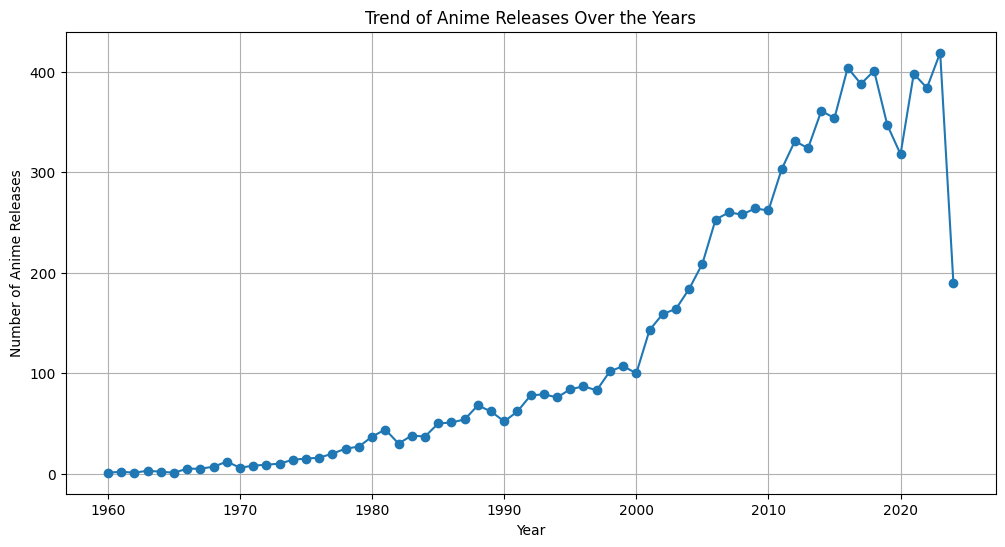

In [22]:
# Plotar o número de lançamentos por ano
plt.figure(figsize=(12, 6))
anime_releases_per_year.plot(kind='line', marker='o')
plt.title('Trend of Anime Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Anime Releases')
plt.grid(True)
plt.show()


In [23]:
df.head()

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Start Year,Year
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,800615,9.35,2023.0,2023.0
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,3373923,9.09,2009.0,2009.0
2,3,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,2584616,9.07,2011.0,2011.0
3,4,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,636631,9.06,2015.0,2015.0
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,2305044,9.05,2019.0,2019.0


4- Quais são as principais características dos animes que estão no topo do ranking de pontuação?

In [24]:
# Definir um limite para o topo do ranking (por exemplo, top 10% de pontuação)
top_percentage = 0.1
top_threshold = df['Score'].quantile(1 - top_percentage)

# Filtrar os animes que estão no topo do ranking
top_animes = df[df['Score'] >= top_threshold]

# Exibir as primeiras linhas dos animes top ranked
print(top_animes.head())


   UID                               Title  Rank Stream type  Episodes  \
0    1                   Sousou no Frieren     1         TV       28.0   
1    2    Fullmetal Alchemist: Brotherhood     2         TV       64.0   
2    3                         Steins;Gate     3         TV       24.0   
3    4                            Gintama°     4         TV       51.0   
4    5  Shingeki no Kyojin Season 3 Part 2     5         TV       10.0   

  Start date   End date  Members  Score  Start Year    Year  
0 2023-09-01 2024-03-01   800615   9.35      2023.0  2023.0  
1 2009-04-01 2010-07-01  3373923   9.09      2009.0  2009.0  
2 2011-04-01 2011-09-01  2584616   9.07      2011.0  2011.0  
3 2015-04-01 2016-03-01   636631   9.06      2015.0  2015.0  
4 2019-04-01 2019-07-01  2305044   9.05      2019.0  2019.0  


In [25]:
# Estatísticas descritivas dos animes top ranked
top_animes_stats = top_animes[['Score', 'Episodes', 'Members']].describe()
print(top_animes_stats)

# Distribuição por ano de lançamento
top_animes['Year'] = top_animes['Start date'].dt.year
year_distribution = top_animes['Year'].value_counts().sort_index()
print(year_distribution)


            Score    Episodes       Members
count  877.000000  877.000000  8.770000e+02
mean     8.205827   18.179019  4.607736e+05
std      0.275509   33.486774  5.878971e+05
min      7.860000    1.000000  8.880000e+02
25%      7.990000    1.000000  8.015900e+04
50%      8.160000   12.000000  2.409120e+05
75%      8.350000   24.000000  5.902000e+05
max      9.350000  500.000000  3.980987e+06
1970     1
1977     1
1978     2
1979     2
1980     1
1982     2
1984     3
1985     2
1986     4
1987     1
1988     6
1989     3
1990     1
1992     2
1993     5
1994     2
1995     5
1996     7
1997     6
1998     8
1999     7
2000     7
2001     7
2002    12
2003    12
2004    15
2005    13
2006    28
2007    24
2008    30
2009    30
2010    29
2011    29
2012    36
2013    33
2014    33
2015    47
2016    41
2017    40
2018    45
2019    53
2020    38
2021    60
2022    59
2023    55
2024    30
Name: Year, dtype: int64


C:\Users\Matheus\AppData\Local\Temp\ipykernel_10108\3981607225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_animes['Year'] = top_animes['Start date'].dt.year


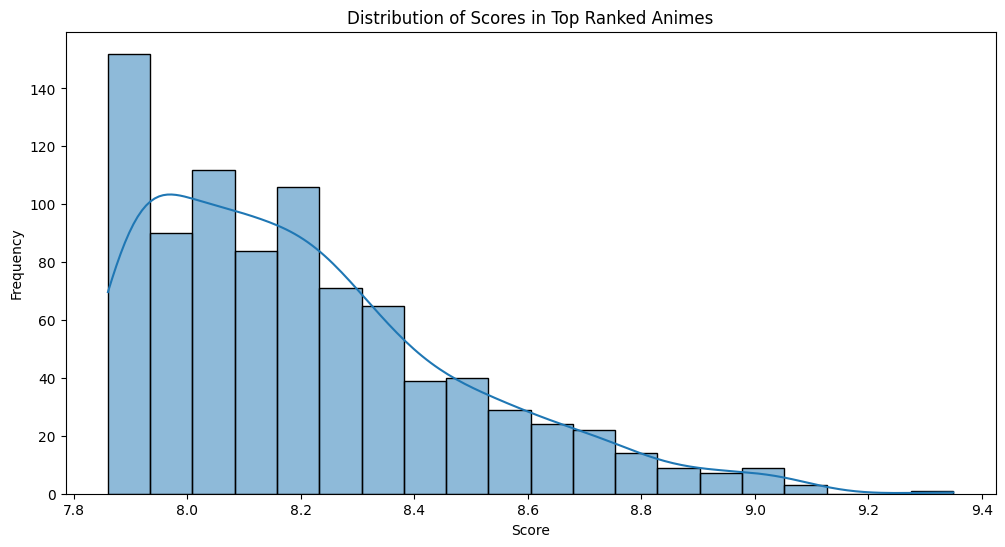

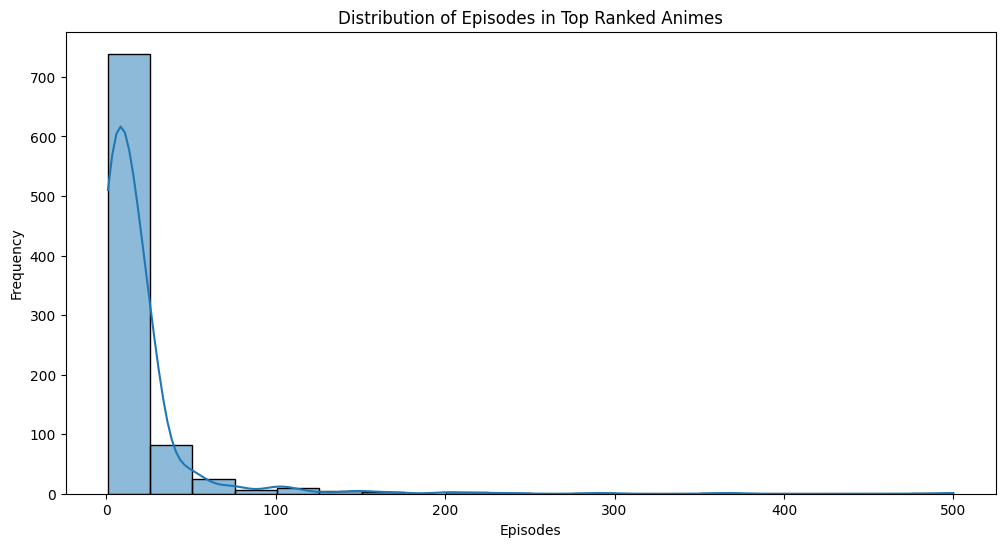

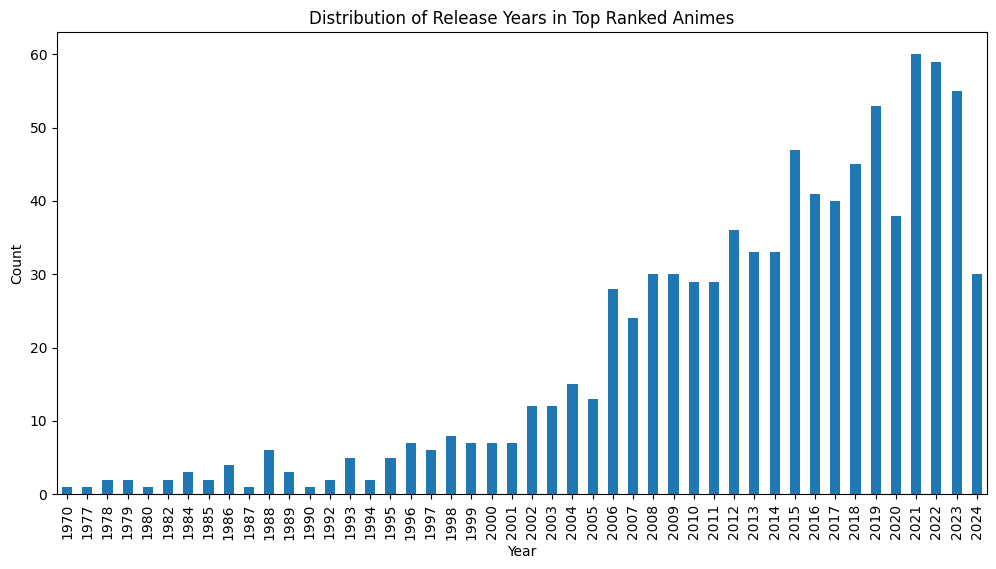

In [26]:
# Plotar a distribuição de pontuação
plt.figure(figsize=(12, 6))
sns.histplot(top_animes['Score'], bins=20, kde=True)
plt.title('Distribution of Scores in Top Ranked Animes')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Plotar a distribuição de episódios
plt.figure(figsize=(12, 6))
sns.histplot(top_animes['Episodes'], bins=20, kde=True)
plt.title('Distribution of Episodes in Top Ranked Animes')
plt.xlabel('Episodes')
plt.ylabel('Frequency')
plt.show()

# Plotar a distribuição de anos de lançamento
plt.figure(figsize=(12, 6))
year_distribution.plot(kind='bar', title='Distribution of Release Years in Top Ranked Animes')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


5- Como a popularidade dos animes varia por ano de lançamento?

In [27]:
# Exibir as primeiras linhas para verificar a coluna 'Start date'
print(df[['Title', 'Start date', 'Members']].head())

                                Title Start date  Members
0                   Sousou no Frieren 2023-09-01   800615
1    Fullmetal Alchemist: Brotherhood 2009-04-01  3373923
2                         Steins;Gate 2011-04-01  2584616
3                            Gintama° 2015-04-01   636631
4  Shingeki no Kyojin Season 3 Part 2 2019-04-01  2305044


In [28]:
# Extrair o ano da coluna 'Start date'
df['Year'] = df['Start date'].dt.year

# Calcular a popularidade média por ano
popularity_per_year = df.groupby('Year')['Members'].mean().sort_index()

# Exibir os resultados
print(popularity_per_year)


Year
1960.0      3557.000000
1961.0      5137.000000
1962.0      4832.000000
1963.0      7007.333333
1964.0      2816.500000
              ...      
2020.0    140083.619497
2021.0    129085.439698
2022.0    103242.255208
2023.0     80688.871122
2024.0     70360.978947
Name: Members, Length: 65, dtype: float64


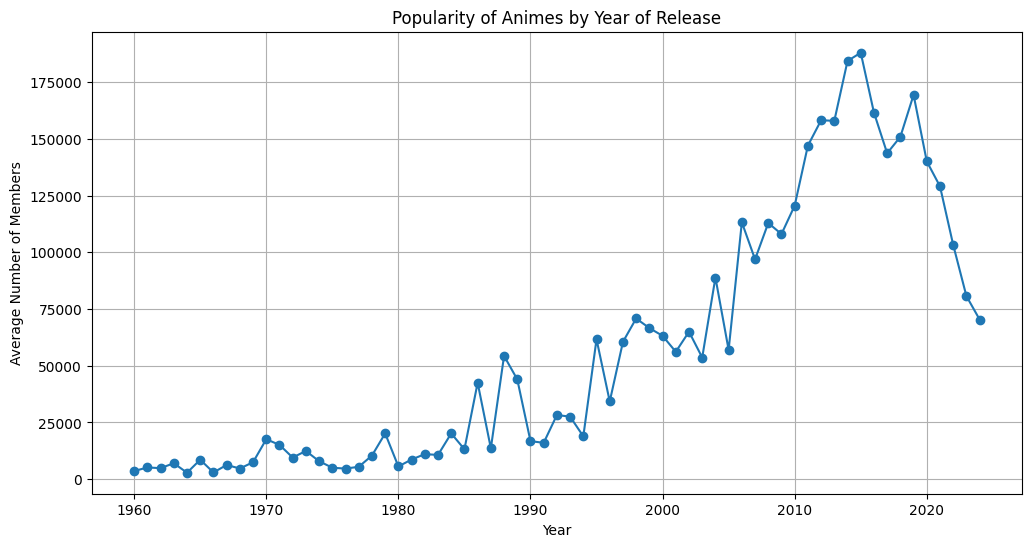

In [29]:
# Plotar a popularidade média por ano
plt.figure(figsize=(12, 6))
popularity_per_year.plot(kind='line', marker='o')
plt.title('Popularity of Animes by Year of Release')
plt.xlabel('Year')
plt.ylabel('Average Number of Members')
plt.grid(True)
plt.show()


 Modelagem Preditiva

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selecionar características e variável alvo
features = ['Episodes', 'Score']
X = df[features]
y = df['Members']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de regressão
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 63980794799.08861


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criar uma coluna categórica para popularidade
threshold = df['Members'].median()
df['Popularity'] = (df['Members'] >= threshold).astype(int)

# Selecionar características e variável alvo
features = ['Episodes', 'Score']
X = df[features]
y = df['Popularity']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de classificação
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7549132947976879


C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


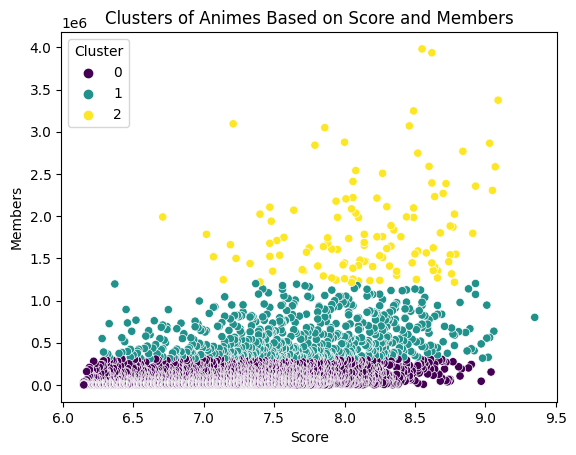

In [32]:
from sklearn.cluster import KMeans
import seaborn as sns

# Selecionar características
features = ['Score', 'Episodes', 'Members']
X = df[features]

# Aplicar KMeans para agrupar os animes
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualizar os clusters
sns.scatterplot(x='Score', y='Members', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Animes Based on Score and Members')
plt.show()
